In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#pd.set_option('max_column', None)
#pd.options.display.float_format = "{:.2f}".format

In [2]:
# Custom Modules
from script import file
from script.df_info import ExplorDf
from script.df_cleaning import CleaningDf

In [3]:
#Load the data
df = pd.read_csv('../data/Week1_challenge_data_source(CSV).csv', na_values=['?', None])

#### Information about the data

In [4]:
exp = ExplorDf(df)
exp.info()

Data Frame contain 150001 rows and 55 columns


In [5]:
#information details
exp.detail_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

#### Null percentage

In [6]:
exp.null_percentage()

Data Frame contain null values of 12.5%


In [7]:
exp.get_null_counts()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

## Skewness of The DataFrame

In [8]:
exp.skewness()

Bearer Id                                     0.026666
Start ms                                      0.000968
End ms                                       -0.001163
Dur. (ms)                                     3.952609
IMSI                                         41.045956
MSISDN/Number                               332.155856
IMEI                                          1.071470
Avg RTT DL (ms)                              62.907828
Avg RTT UL (ms)                              28.457415
Avg Bearer TP DL (kbps)                       2.589437
Avg Bearer TP UL (kbps)                       4.503413
TCP DL Retrans. Vol (Bytes)                  15.951809
TCP UL Retrans. Vol (Bytes)                  84.113393
DL TP < 50 Kbps (%)                          -2.297803
50 Kbps < DL TP < 250 Kbps (%)                3.271453
250 Kbps < DL TP < 1 Mbps (%)                 4.566158
DL TP > 1 Mbps (%)                            5.370351
UL TP < 10 Kbps (%)                          -8.985016
10 Kbps < 

In [9]:
# columns to list
df.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [10]:
# information about null value in each column
df.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

# Data Cleaning

In [11]:
df_clean = CleaningDf(df)

In [12]:
bad_columns = df_clean.get_column_with_many_null()
print("List Of Columns with More than 30% Null Values")
print(bad_columns)

List Of Columns with More than 30% Null Values
['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B']


In [13]:
## Remove Bad columns
df_clean.drop_columns(bad_columns)


In [14]:
#check for null columns
bad_columns = df_clean.get_column_with_many_null()
print("Number Of Columns with More than 30% Null Values After Clean Up")
print(bad_columns)

Number Of Columns with More than 30% Null Values After Clean Up
[]


# Handle Null Values

In [15]:
df_clean.drop_rows(['MSISDN/Number', 'Bearer Id'])

In [16]:
info = ExplorDf(df_clean.df)
info.get_null_counts()

Bearer Id                             0
Start                                 0
Start ms                              0
End                                   0
End ms                                0
Dur. (ms)                             0
IMSI                                  0
MSISDN/Number                         0
IMEI                                  0
Last Location Name                  160
Avg RTT DL (ms)                   27636
Avg RTT UL (ms)                   27616
Avg Bearer TP DL (kbps)               0
Avg Bearer TP UL (kbps)               0
DL TP < 50 Kbps (%)                 712
50 Kbps < DL TP < 250 Kbps (%)      712
250 Kbps < DL TP < 1 Mbps (%)       712
DL TP > 1 Mbps (%)                  712
UL TP < 10 Kbps (%)                 767
10 Kbps < UL TP < 50 Kbps (%)       767
50 Kbps < UL TP < 300 Kbps (%)      767
UL TP > 300 Kbps (%)                767
Activity Duration DL (ms)             0
Activity Duration UL (ms)             0
Dur. (ms).1                           0


In [17]:
#Filling Object Columns with mode
obj_col = ['Last Location Name', 'Handset Manufacturer', 'Handset Type']
df_clean.fill_catagorical_columns(obj_col)

In [19]:
info = ExplorDf(df_clean.df)
info.get_null_counts()

Bearer Id                             0
Start                                 0
Start ms                              0
End                                   0
End ms                                0
Dur. (ms)                             0
IMSI                                  0
MSISDN/Number                         0
IMEI                                  0
Last Location Name                    0
Avg RTT DL (ms)                   27636
Avg RTT UL (ms)                   27616
Avg Bearer TP DL (kbps)               0
Avg Bearer TP UL (kbps)               0
DL TP < 50 Kbps (%)                 712
50 Kbps < DL TP < 250 Kbps (%)      712
250 Kbps < DL TP < 1 Mbps (%)       712
DL TP > 1 Mbps (%)                  712
UL TP < 10 Kbps (%)                 767
10 Kbps < UL TP < 50 Kbps (%)       767
50 Kbps < UL TP < 300 Kbps (%)      767
UL TP > 300 Kbps (%)                767
Activity Duration DL (ms)             0
Activity Duration UL (ms)             0
Dur. (ms).1                           0


In [20]:
#Fill Other numeric null columns with mode
columns = df_clean.df.columns
df_clean.fill_catagorical_columns(columns)

In [21]:
info = ExplorDf(df_clean.df)
info.get_null_counts()

Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer              0
Handset Type                      0
Nb of sec with Vol DL < 6250

# Outliers

In [22]:
df_clean.fix_outliers('Dur. (ms)')

In [23]:
info = ExplorDf(df_clean.df)
info.skewness()

Bearer Id                           0.021237
Start ms                            0.000563
End ms                             -0.000781
Dur. (ms)                           0.811218
IMSI                             -269.349864
MSISDN/Number                     331.677128
IMEI                                1.068191
Avg RTT DL (ms)                    73.608064
Avg RTT UL (ms)                    31.619786
Avg Bearer TP DL (kbps)             2.589861
Avg Bearer TP UL (kbps)             4.499001
DL TP < 50 Kbps (%)                -2.309370
50 Kbps < DL TP < 250 Kbps (%)      3.290110
250 Kbps < DL TP < 1 Mbps (%)       4.587190
DL TP > 1 Mbps (%)                  5.371920
UL TP < 10 Kbps (%)                -9.016768
10 Kbps < UL TP < 50 Kbps (%)      10.986723
50 Kbps < UL TP < 300 Kbps (%)     21.913794
UL TP > 300 Kbps (%)               36.188478
Activity Duration DL (ms)           5.852521
Activity Duration UL (ms)           7.357988
Dur. (ms).1                         3.968797
Nb of sec 

Null percentage After data cleaning

In [24]:
#Null percentage After data cleaning
info.null_percentage()

Data Frame contain null values of 0.0%


# Transforming Data

Scaling and Normalization

In [25]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

# generate 1000 data points randomly drawn from an exponential distribution
original_data = pd.DataFrame(np.random.exponential(200, size=2000))

original_data.sample(5)

0
1498  241.400630
1254  194.469614
57    100.370610
221   328.626731
420    68.811957

In [26]:
original_data[0].min(), original_data[0].max()

(0.07243067276737974, 1585.39275458064)

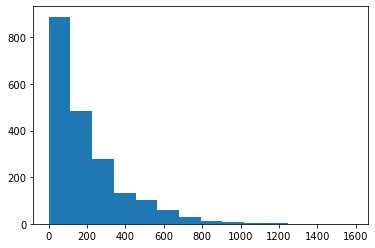

In [27]:
count, bins, ignored = plt.hist(original_data, 14)
plt.show()

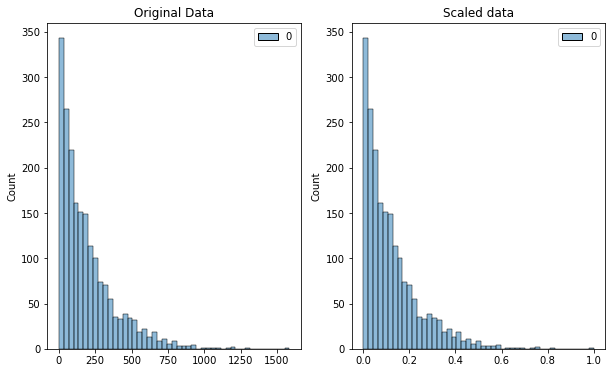

In [28]:
# mix-max scale the data between 0 and 1
def scaler(df):
    scaled_data = minmax_scaler.fit_transform(df)

    # plot both together to compare
    fig, ax = plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(original_data, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(scaled_data, ax=ax[1])
    ax[1].set_title("Scaled data")
    
scaler(original_data)

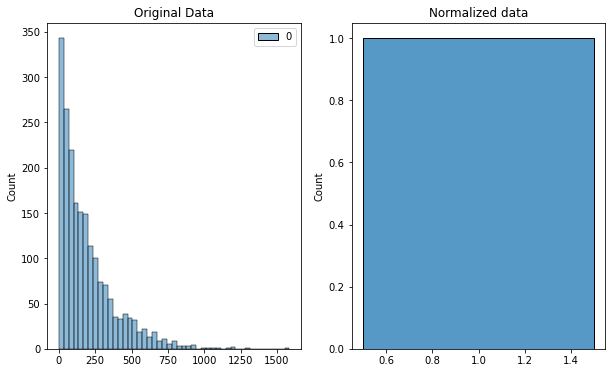

In [29]:
from sklearn.preprocessing import Normalizer

def normalizer(df):
    norm = Normalizer()
    # normalize the exponential data with boxcox
    normalized_data = norm.fit_transform(df)

    # plot both together to compare
    fig, ax=plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(df, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(normalized_data[0], ax=ax[1])
    ax[1].set_title("Normalized data")

normalizer(original_data)

In [30]:
# check datatypes
info.info()

Data Frame contain 148506 rows and 45 columns


# Utility Functions

In [31]:
# Function to calculate missing values by column
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # dtype of missing values
    mis_val_dtype = df.dtypes

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Dtype'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

def format_float(value):
    return f'{value:,.2f}'

def find_agg(df:pd.DataFrame, agg_column:str, agg_metric:str, col_name:str, top:int, order=False )->pd.DataFrame:
    
    new_df = df.groupby(agg_column)[agg_column].agg(agg_metric).reset_index(name=col_name).\
                        sort_values(by=col_name, ascending=order)[:top]
    
    return new_df

def convert_bytes_to_megabytes(df, bytes_data):
    """
        This function takes the dataframe and the column which has the bytes values
        returns the megabytesof that value
        
        Args:
        -----
        df: dataframe
        bytes_data: column with bytes values
        
        Returns:
        --------
        A series
    """
    
    megabyte = 1*10e+5
    df[bytes_data] = df[bytes_data] / megabyte
    return df[bytes_data]

def fix_outlier(df, column):
    df[column] = np.where(df[column] > df[column].quantile(0.95), df[column].median(),df[column])
    
    return df[column]


###################################PLOTTING FUNCTIONS###################################

def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_count(df:pd.DataFrame, column:str, color:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()


pd.options.display.float_format = format_float

# Extracting Data

In [32]:
# should be null
info = ExplorDf(df_clean.df)
info.get_null_counts()

Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer              0
Handset Type                      0
Nb of sec with Vol DL < 6250

# Exploration

*   detection of mistakes, outliers or abnormalities
*   determining relationships among the explanatory variables
*   assessing the relationships between explanatory and outcome variables

In [33]:
# already cleaned data is there.
df = pd.read_csv('C:/Users/user/Desktop/10Academy/Week-1/data/cleaned_data.csv')
df

Bearer Id                Start  Start ms  \
0      13,114,483,460,844,900,352.00  2019-04-04 12:01:00    770.00   
1      13,114,483,482,878,900,224.00  2019-04-09 13:04:00    235.00   
2      13,114,483,484,080,500,736.00  2019-04-09 17:42:00      1.00   
3      13,114,483,485,442,799,616.00  2019-04-10 00:31:00    486.00   
4      13,114,483,499,480,700,928.00  2019-04-12 20:10:00    565.00   
...                              ...                  ...       ...   
149996  7,277,825,670,196,679,680.00  2019-04-29 07:28:00    451.00   
149997  7,349,883,264,234,609,664.00  2019-04-29 07:28:00    483.00   
149998 13,114,483,573,367,300,096.00  2019-04-29 07:28:00    283.00   
149999 13,114,483,573,367,300,096.00  2019-04-29 07:28:00    696.00   
150000  7,349,883,264,156,584,960.00  2019-04-26 07:25:00    499.00   

                        End  End ms    Dur. (ms)             IMSI  \
0       2019-04-25 14:35:00  662.00 1,823,652.00  208201448079117   
1       2019-04-25 08:15:00  606.00 1,365,104.00  208201909211140   
2       2019-04-25 11:58:00  652.00 1,361,762.00  208200314458056   
3       2019-04-25 07:36:00  171.00 1,321,509.00  208201402342131   
4       2019-04-25 10:40:00  954.00 1,089,009.00  208201401415120   
...                     ...     ...          ...              ...   
149996  2019-04-30 06:02:00  214.00    81,230.00  208202201200072   
149997  2019-04-30 10:41:00  187.00    97,970.00  208201908153249   
149998  2019-04-30 10:46:00  810.00    98,249.00  208201711161187   
149999  2019-04-30 10:40:00  327.00    97,910.00  208202101098075   
150000  2019-04-25 00:01:00  500.00    86,399.00  208201546329113   

        MSISDN/Number            IMEI     Last Location Name  ...  \
0         33664962239  35521209507511  9.16456699548519E+015  ...   
1         33681854413  35794009006359                L77566A  ...   
2         33760627129  35281510359387                D42335A  ...   
3         33750343200  35356610164913                T21824A  ...   
4         33699795932  35407009745539                D88865A  ...   
...               ...             ...                    ...  ...   
149996    33650688697  35483109451938                D20434A  ...   
149997    33663449963  35660508296467                D10223C  ...   
149998    33621890103  35721209870907                T51102A  ...   
149999    33619622058  86186204011457                L88342B  ...   
150000    33663706799  35722009426311                D41377B  ...   

        Youtube DL (Bytes)  Youtube UL (Bytes)  Netflix DL (Bytes)  \
0            15,854,611.00        2,501,332.00        8,198,936.00   
1            20,247,395.00       19,111,729.00       18,338,413.00   
2            19,725,661.00       14,699,576.00       17,587,794.00   
3            21,388,122.00       15,146,643.00       13,994,646.00   
4            15,259,380.00       18,962,873.00       17,124,581.00   
...                    ...                 ...                 ...   
149996       16,191,667.00       11,763,428.00       17,883,703.00   
149997       13,877,234.00        8,288,284.00       19,350,146.00   
149998       22,660,510.00        1,855,903.00        9,963,942.00   
149999        8,817,106.00        8,305,402.00        3,322,253.00   
150000       11,634,072.50       11,009,410.13       11,626,851.72   

        Netflix UL (Bytes)  Gaming DL (Bytes)  Gaming UL (Bytes)  \
0             9,656,251.00     278,082,303.00      14,344,150.00   
1            17,227,132.00     608,750,074.00       1,170,709.00   
2             6,163,408.00     229,584,621.00         395,630.00   
3             1,097,942.00     799,538,153.00      10,849,722.00   
4               415,218.00     527,707,248.00       3,529,801.00   
...                    ...                ...                ...   
149996       19,678,161.00     526,609,673.00       9,197,207.00   
149997       21,293,148.00     626,893,062.00       4,735,033.00   
149998        5,065,760.00     553,539,484.00      13,394,316.0

In [34]:
df.dtypes

Bearer Id                         float64
Start                              object
Start ms                          float64
End                                object
End ms                            float64
Dur. (ms)                         float64
IMSI                                int64
MSISDN/Number                       int64
IMEI                                int64
Last Location Name                 object
Avg RTT DL (ms)                   float64
Avg RTT UL (ms)                   float64
Avg Bearer TP DL (kbps)           float64
Avg Bearer TP UL (kbps)           float64
DL TP < 50 Kbps (%)               float64
50 Kbps < DL TP < 250 Kbps (%)    float64
250 Kbps < DL TP < 1 Mbps (%)     float64
DL TP > 1 Mbps (%)                float64
UL TP < 10 Kbps (%)               float64
10 Kbps < UL TP < 50 Kbps (%)     float64
50 Kbps < UL TP < 300 Kbps (%)    float64
UL TP > 300 Kbps (%)              float64
Activity Duration DL (ms)         float64
Activity Duration UL (ms)         

In [35]:
df.isnull().sum()

Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer              0
Handset Type                      0
Nb of sec with Vol DL < 6250

##### Non-Graphical Univariate Analysis

In [36]:
# statistical information
df.describe().T

count                          mean  \
Bearer Id                      150,001.00 10,120,448,840,645,199,872.00   
Start ms                       150,001.00                        499.19   
End ms                         150,001.00                        498.80   
Dur. (ms)                      150,001.00                    104,608.44   
IMSI                           150,001.00        208,201,639,297,050.62   
MSISDN/Number                  150,001.00             41,824,409,439.85   
IMEI                           150,001.00         48,425,918,621,507.17   
Avg RTT DL (ms)                150,001.00                         97.77   
Avg RTT UL (ms)                150,001.00                         15.32   
Avg Bearer TP DL (kbps)        150,001.00                     13,299.96   
Avg Bearer TP UL (kbps)        150,001.00                      1,770.42   
DL TP < 50 Kbps (%)            150,001.00                         92.88   
50 Kbps < DL TP < 250 Kbps (%) 150,001.00                          3.05   
250 Kbps < DL TP < 1 Mbps (%)  150,001.00                          1.71   
DL TP > 1 Mbps (%)             150,001.00                          1.60   
UL TP < 10 Kbps (%)            150,001.00                         98.54   
10 Kbps < UL TP < 50 Kbps (%)  150,001.00                          0.77   
50 Kbps < UL TP < 300 Kbps (%) 150,001.00                          0.15   
UL TP > 300 Kbps (%)           150,001.00                          0.08   
Activity Duration DL (ms)      150,001.00                  1,829,164.94   
Activity Duration UL (ms)      150,001.00                  1,408,870.89   
Dur. (ms).1                    150,001.00                104,608,984.15   
Nb of sec with Vol DL < 6250B  150,001.00                      3,702.09   
Nb of sec with Vol UL < 1250B  150,001.00                      4,001.97   
Social Media DL (Bytes)        150,001.00                  1,795,321.77   
Social Media UL (Bytes)        150,001.00                     32,928.43   
Google DL (Bytes)              150,001.00                  5,750,752.62   
Google UL (Bytes)              150,001.00                  2,056,541.93   
Email DL (Bytes)               150,001.00                  1,791,728.87   
Email UL (Bytes)               150,001.00                    467,373.44   
Youtube DL (Bytes)             150,001.00                 11,634,072.50   
Youtube UL (Bytes)             150,001.00                 11,009,410.13   
Netflix DL (Bytes)             150,001.00                 11,626,851.72   
Netflix UL (Bytes)             150,001.00                 11,001,754.82   
Gaming DL (Bytes)              150,001.00                422,044,702.60   
Gaming UL (Bytes)              150,001.00                  8,288,398.11   
Other DL (Bytes)               150,001.00                421,100,544.19   
Other UL (Bytes)               150,001.00                  8,264,799.42   
Total UL (Bytes)               150,001.00                 41,121,206.44   
Total DL (Bytes)               150,001.00                454,643,438.06   

                                                        std  \
Bearer Id                      2,892,437,846,624,034,304.00   
Start ms                                             288.61   
End ms                                               288.10   
Dur. (ms)                                         81,037.36   
IMSI                                      21,447,225,377.50   
MSISDN/Number                          2,438,731,368,208.44   
IMEI                                  22,387,392,564,342.69   
Avg RTT DL (ms)                                      559.91   
Avg RTT UL (ms)                                       76.69   
Avg Bearer TP DL (kbps)                           23,971.82   
Avg Bearer TP UL (kbps)                            4,625.34   
DL TP < 50 Kbps (%)                                   13.02   
50 Kbps < DL TP < 250 Kbps (%)                         6.20   
250 Kbps < DL TP < 1 Mbps (%)                          4.15   
DL TP > 1 Mbps 

## Univariate Analysis

### distributions

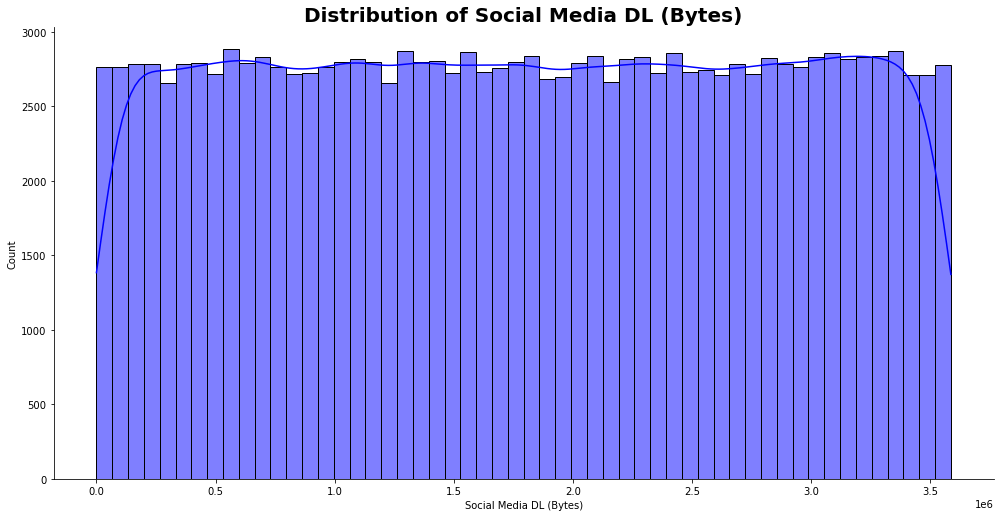

In [37]:
plot_hist(df, "Social Media DL (Bytes)", "blue")

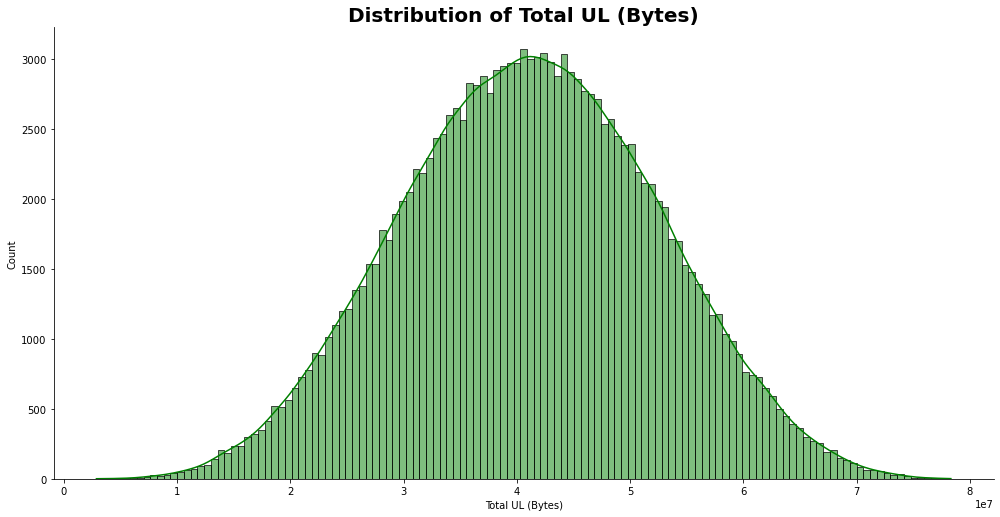

In [38]:
plot_hist(df, "Total UL (Bytes)", "green")

In [39]:
df["Total UL (Bytes)"].describe()

count      150,001.00
mean    41,121,206.44
std     11,276,348.93
min      2,866,892.00
25%     33,222,029.00
50%     41,143,312.00
75%     49,034,238.00
max     78,331,311.00
Name: Total UL (Bytes), dtype: float64

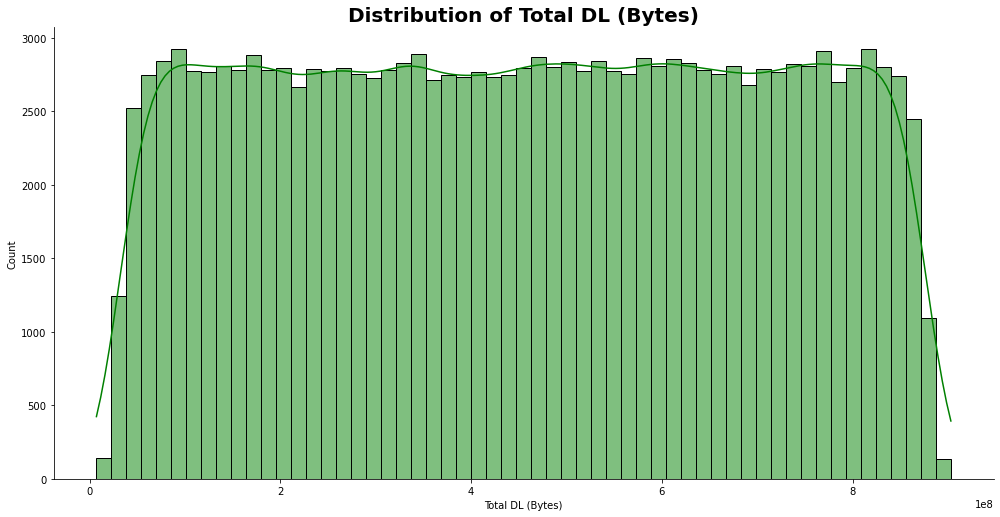

In [40]:
plot_hist(df, "Total DL (Bytes)", "green")

### Outliers

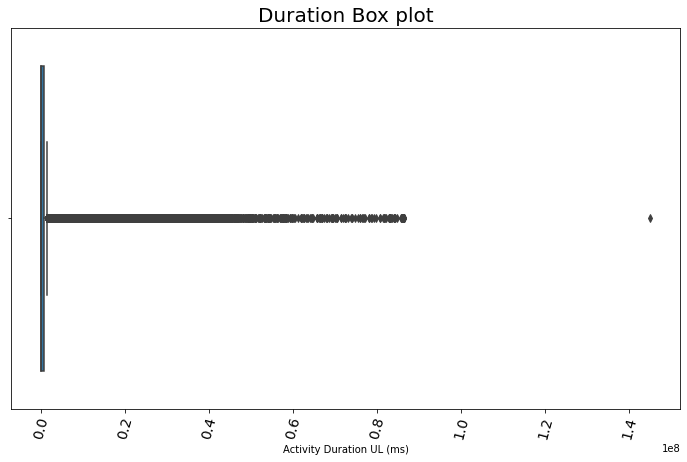

In [40]:
plot_box(df,'Activity Duration UL (ms)', 'Duration Box plot')

<AxesSubplot:>

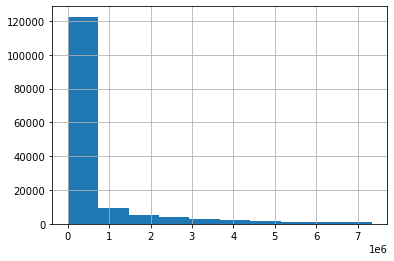

In [41]:
# fixing outlier
df['Activity Duration UL (ms)']=fix_outlier(df, 'Activity Duration UL (ms)')
# After ouliers become fixed
df['Activity Duration UL (ms)'].hist()

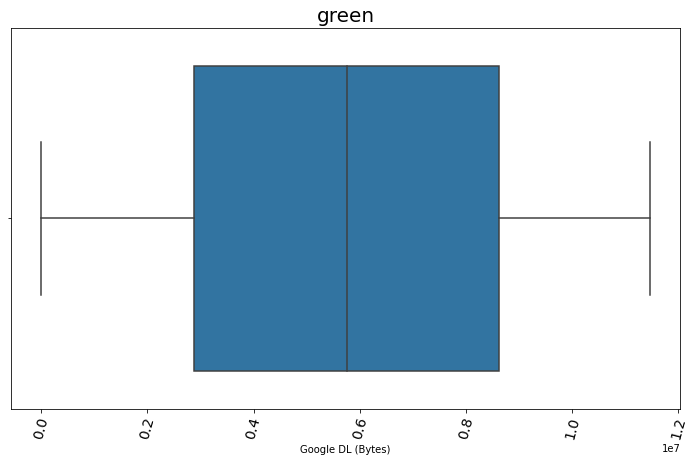

In [17]:
plot_box(df,'Google DL (Bytes)', 'green')

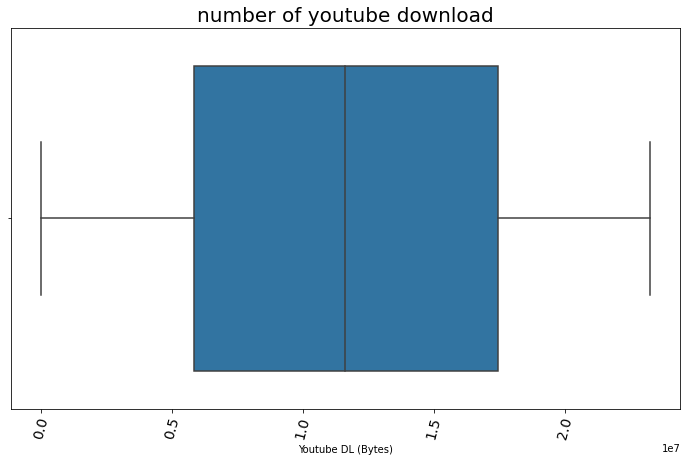

In [18]:
plot_box(df, "Youtube DL (Bytes)", "number of youtube download")

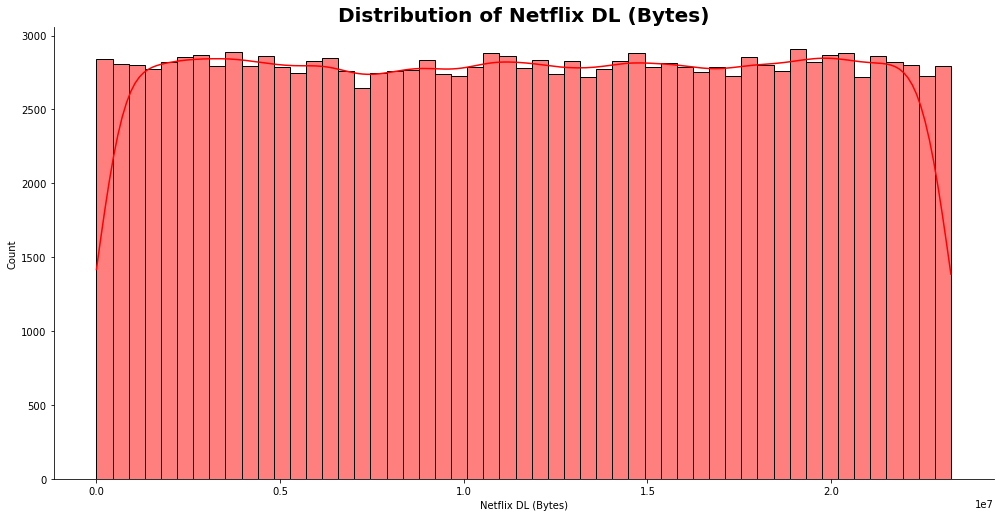

In [19]:
plot_hist(df, "Netflix DL (Bytes)", "red")

In [21]:
df["Netflix DL (Bytes)"].describe()

count      148,506.00
mean    11,627,241.74
std      6,724,993.74
min             42.00
25%      5,778,898.50
50%     11,642,380.00
75%     17,470,916.50
max     23,259,189.00
Name: Netflix DL (Bytes), dtype: float64

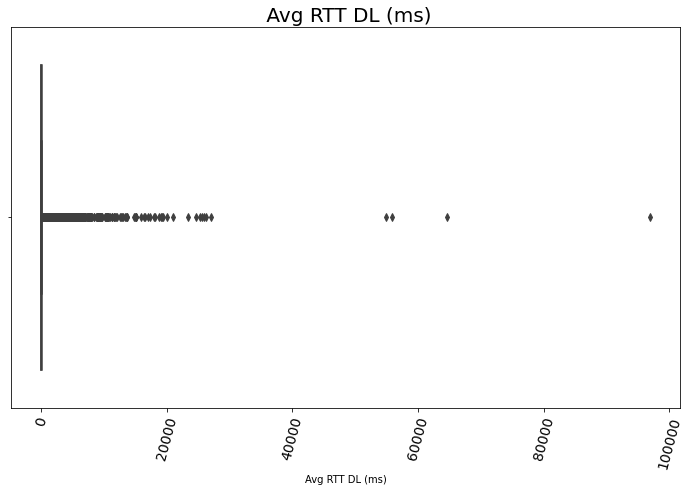

In [78]:
plot_box(df,'Avg RTT DL (ms)', " Avg RTT DL (ms)")

<AxesSubplot:>

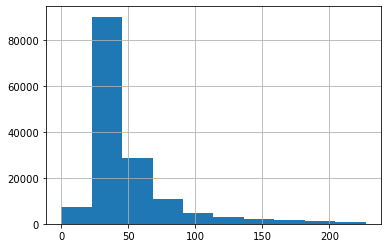

In [79]:
# fixing outlier
df['Avg RTT DL (ms)']=fix_outlier(df, 'Avg RTT DL (ms)')
# After ouliers become fixed
df['Avg RTT DL (ms)'].hist()

### categorical variables

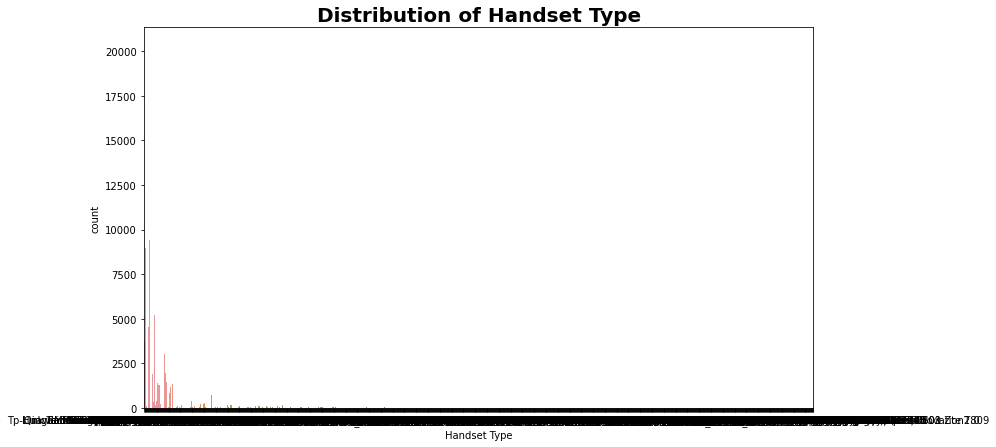

In [43]:
plot_count(df, "Handset Type","green" )


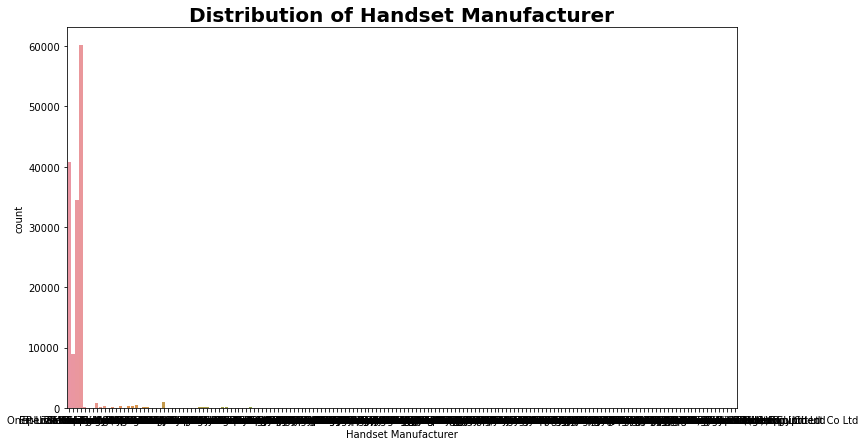

In [46]:
plot_count(df, "Handset Manufacturer", "blue")

In [47]:
df["Handset Manufacturer"].value_counts()

Apple                               60137
Samsung                             40839
Huawei                              34423
undefined                            8987
Sony Mobile Communications Ab         980
                                    ...  
Pt. Arga Mas Lestari                    1
Doke Communication (Hk) Limited         1
Vastking Technology (Hk) Limited        1
Mobiwire Sas                            1
Shenzhen Gaoxinqi                       1
Name: Handset Manufacturer, Length: 170, dtype: int64

<AxesSubplot:>

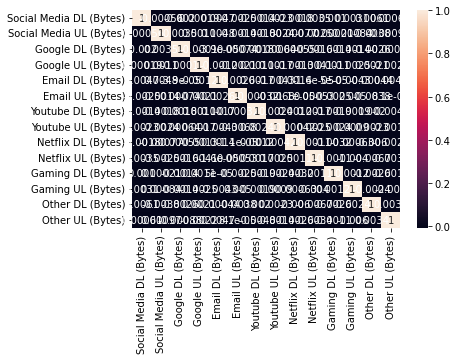

In [41]:
#correlation matrix
cols = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
            'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 
            'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
            'Other DL (Bytes)', 'Other UL (Bytes)']
data_corr = df[cols]
sns.heatmap(data_corr.corr(), annot = True, square=False)

### Multivariate Analysis

In [42]:
#Multivariate analysis
def total_data_per_app(df):
    cols = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
            'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 
            'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
            'Other DL (Bytes)', 'Other UL (Bytes)']
    df['Social Media'] = df[cols[0]] + df[cols[1]]
    df['Google'] = df[cols[2]] + df[cols[3]]
    df['Email'] = df[cols[4]] + df[cols[5]]
    df['Youtube'] = df[cols[6]] + df[cols[7]]
    df['Netflix'] = df[cols[8]] + df[cols[9]]
    df['Gaming'] = df[cols[10]] + df[cols[11]]
    df['Other'] = df[cols[12]] + df[cols[13]]
    return df
data = total_data_per_app(df)

In [43]:
appdata = df[['Social Media','Google', 'Email','Youtube','Netflix','Gaming','Other']]
appdata.head(5)

Social Media        Google        Email       Youtube       Netflix  \
0  1,570,185.00  2,905,912.00 3,701,304.00 18,355,943.00 17,855,187.00   
1  1,933,278.00  4,414,096.00   937,385.00 39,359,124.00 35,565,545.00   
2  1,726,277.00 10,229,119.00 3,363,124.00 34,425,237.00 23,751,202.00   
3    657,493.00 11,811,761.00 2,070,983.00 36,534,765.00 15,092,588.00   
4    912,788.00  7,748,843.00 2,110,349.00 34,222,253.00 17,539,799.00   

          Gaming          Other  
0 292,426,453.00 180,558,843.00  
1 609,920,783.00 541,959,383.00  
2 229,980,251.00 414,908,351.00  
3 810,387,875.00 761,837,216.00  
4 531,237,049.00 564,619,822.00

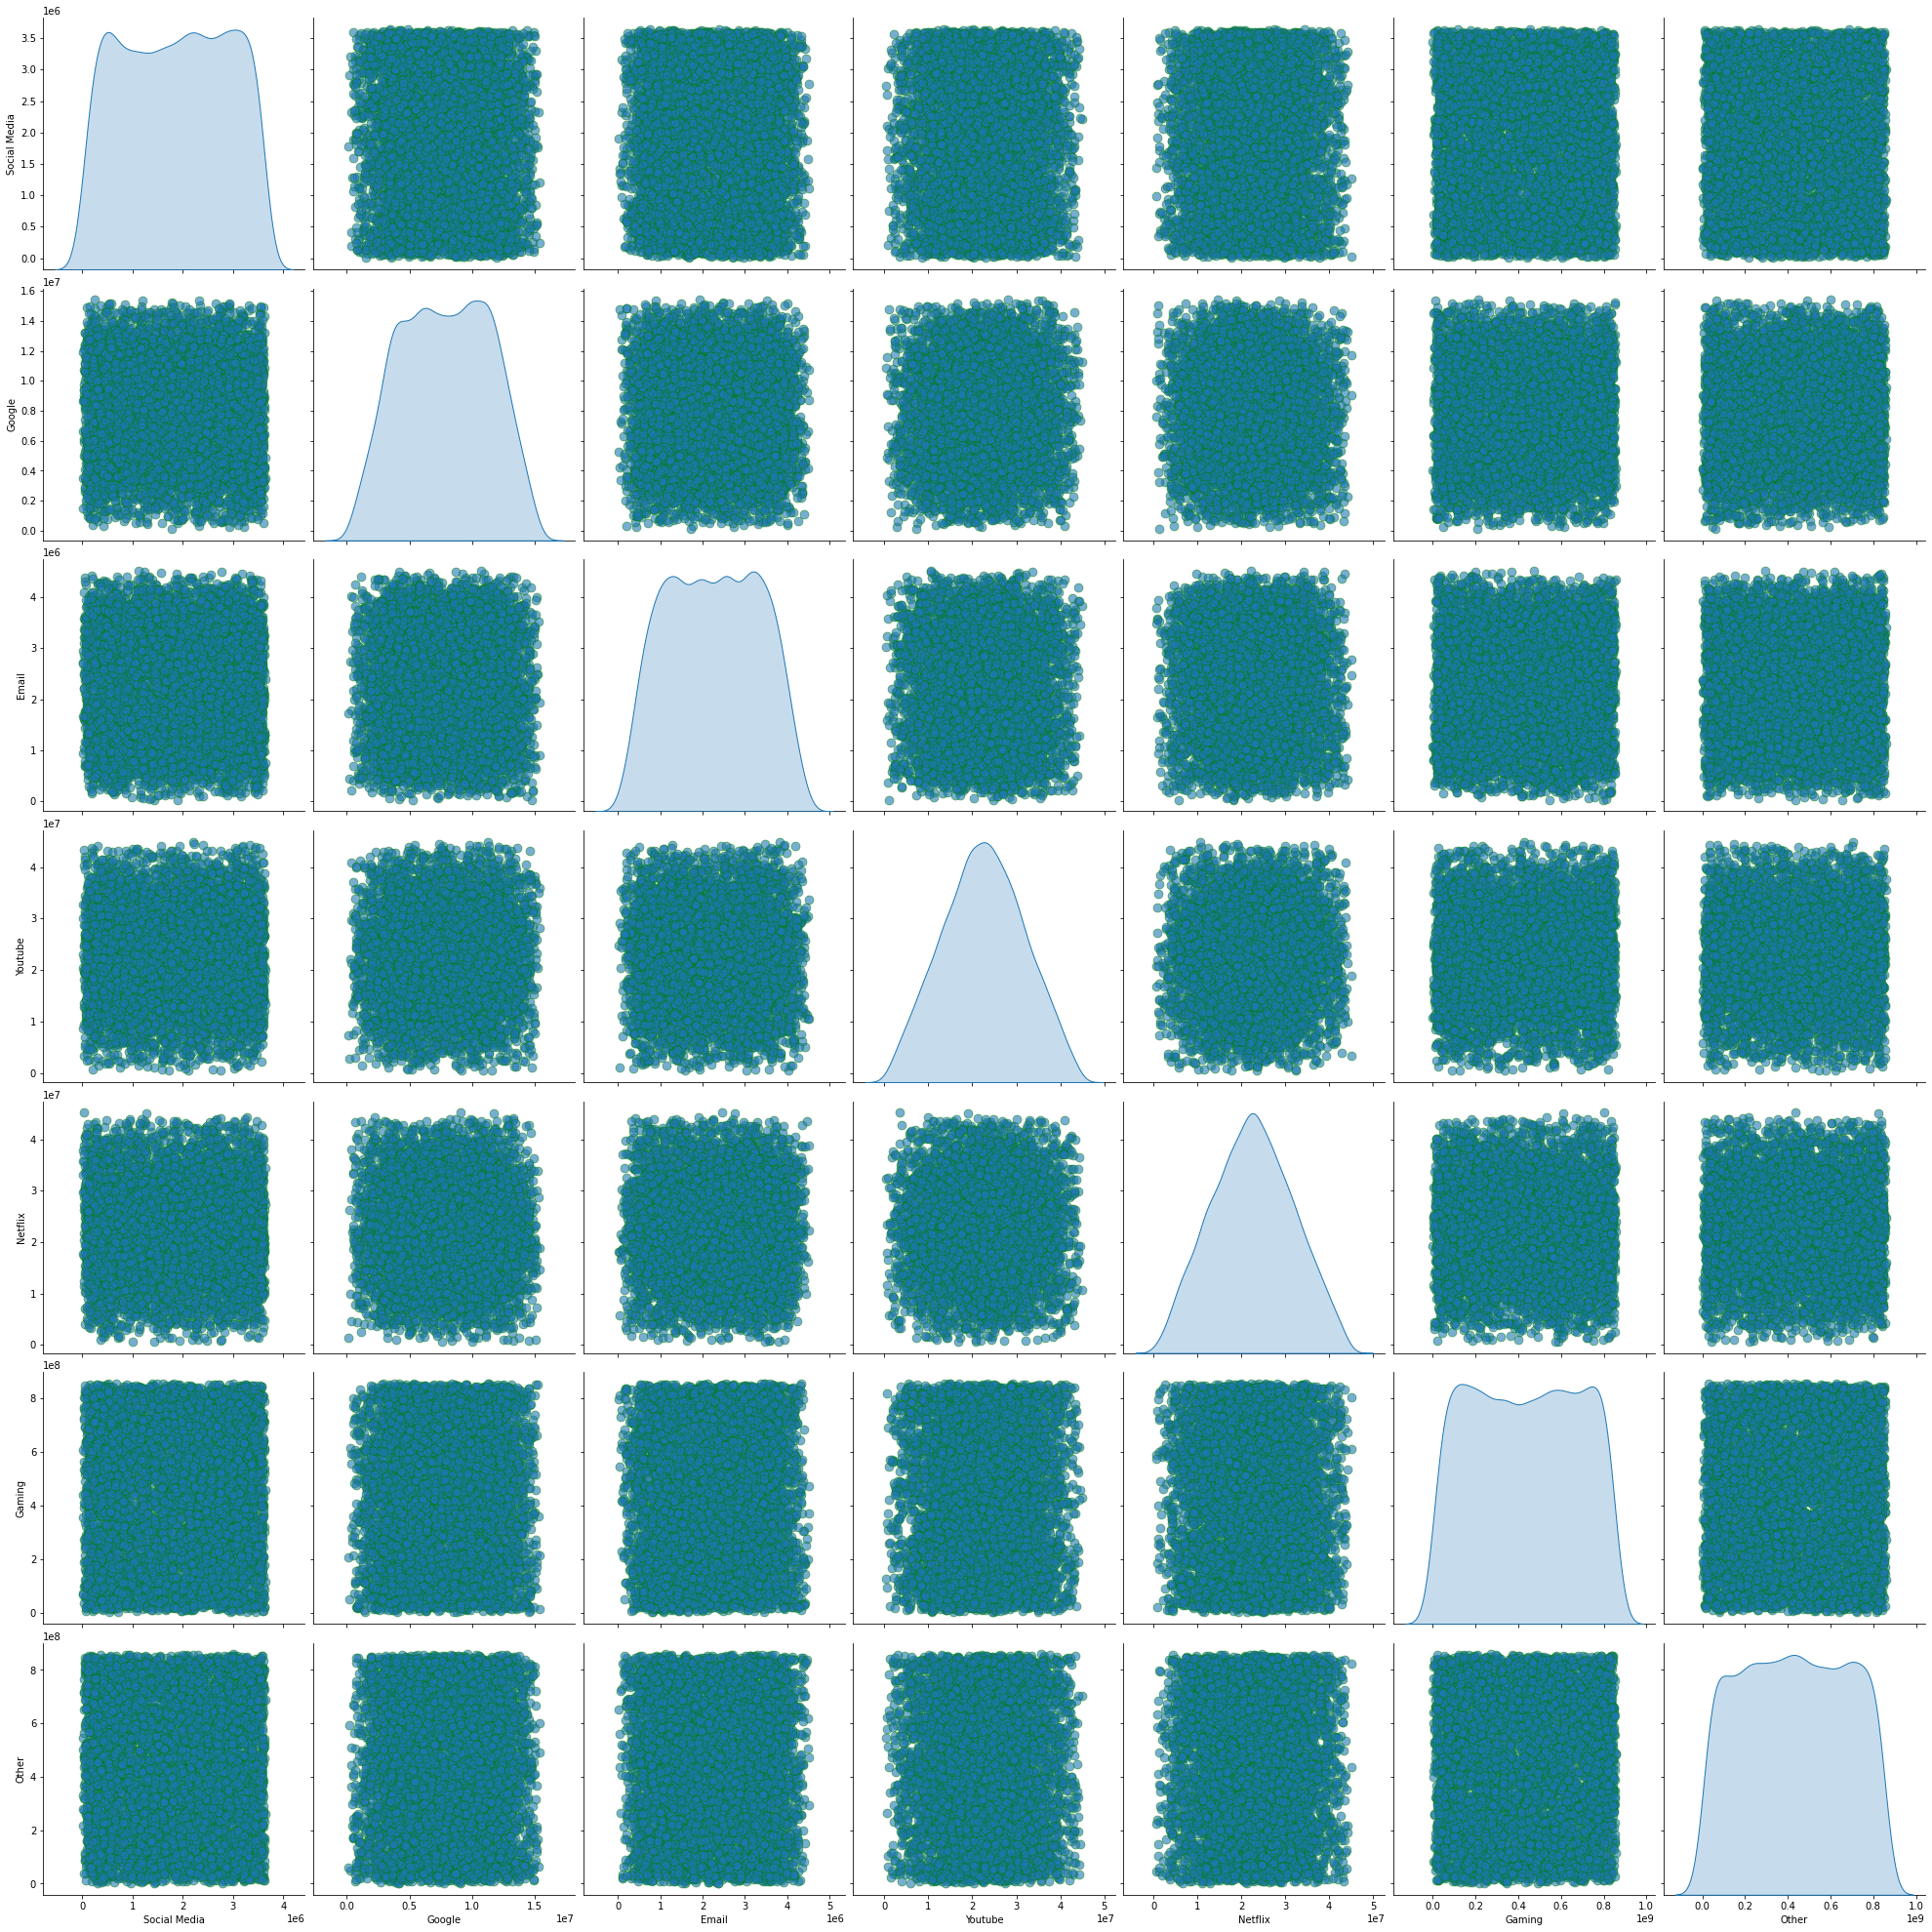

In [44]:
sns.pairplot(appdata.sample(6000), diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'g'},height=4)

#### scatter plots

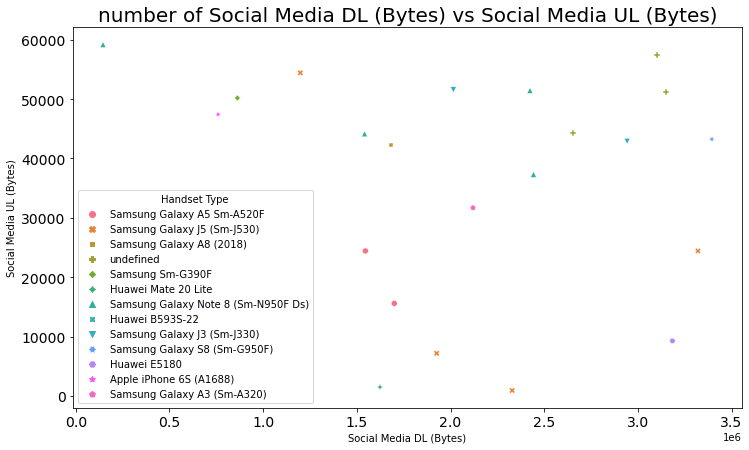

In [50]:
plot_scatter(df.head(25), x_col="Social Media DL (Bytes)", y_col="Social Media UL (Bytes)", hue="Handset Type", 
             style="Handset Type", title="number of Social Media DL (Bytes) vs Social Media UL (Bytes)")

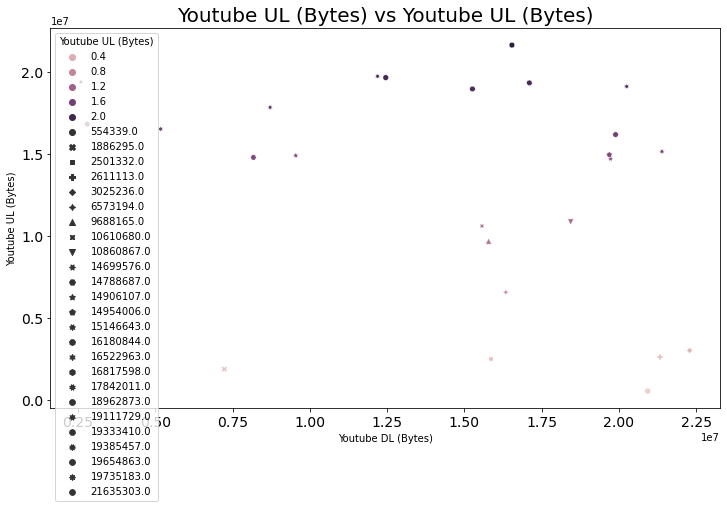

In [51]:
# relashinship among 
plot_scatter(df.head(25), x_col="Youtube DL (Bytes)", y_col="Youtube UL (Bytes)", hue="Youtube UL (Bytes)", 
             style="Youtube UL (Bytes)", title="Youtube UL (Bytes) vs Youtube UL (Bytes)")

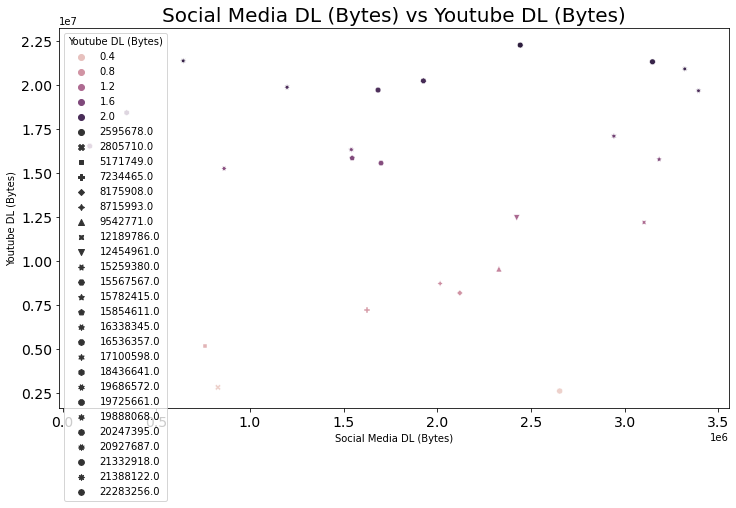

In [55]:
# relashinship among 
plot_scatter(df.head(25), x_col="Social Media DL (Bytes)", y_col="Youtube DL (Bytes)", hue="Youtube DL (Bytes)", 
             style="Youtube DL (Bytes)", title="Social Media DL (Bytes) vs Youtube DL (Bytes)")

#### pair plots

pair plots also known as scatterplot matrix, they allow us to see both distributions of single columns and the relationship between two columns

In [57]:
dfP = df[["Handset Manufacturer", "Dur. (ms).1", "Youtube DL (Bytes)", "Netflix DL (Bytes)", "Google DL (Bytes)"]]

In [ ]:
sns.pairplot(dfP, hue = 'Handset Manufacturer', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height=4)